In [1]:
import os
import shutil
import time
from torchvision import datasets
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
import torch.optim as optim

In [2]:
src = "/kaggle/input/bird-species-classification/train_data/"

for path, subdirs, files in os.walk(src):
    print(f"There are {len(subdirs)} directories and {len(files)} images in '{path}'.")


There are 1 directories and 0 images in '/kaggle/input/bird-species-classification/train_data/'.
There are 16 directories and 0 images in '/kaggle/input/bird-species-classification/train_data/train_data'.
There are 0 directories and 5 images in '/kaggle/input/bird-species-classification/train_data/train_data/brhkyt'.
There are 0 directories and 7 images in '/kaggle/input/bird-species-classification/train_data/train_data/cbrtsh'.
There are 0 directories and 20 images in '/kaggle/input/bird-species-classification/train_data/train_data/himgri'.
There are 0 directories and 9 images in '/kaggle/input/bird-species-classification/train_data/train_data/indvul'.
There are 0 directories and 9 images in '/kaggle/input/bird-species-classification/train_data/train_data/hsparo'.
There are 0 directories and 15 images in '/kaggle/input/bird-species-classification/train_data/train_data/blasti'.
There are 0 directories and 7 images in '/kaggle/input/bird-species-classification/train_data/train_data/cmnm

In [3]:
# Setup train and testing paths
train_dir = "/kaggle/input/bird-species-classification/train_data/train_data"
test_dir = "/kaggle/input/bird-species-classification/test_data/test_data/"

print(train_dir, test_dir)

batch_size=4
transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.CenterCrop(224),
     transforms.ToTensor()])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         drop_last=True)

test_dataset = datasets.ImageFolder(test_dir, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         drop_last=True)

/kaggle/input/bird-species-classification/train_data/train_data /kaggle/input/bird-species-classification/test_data/test_data/


classes ['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
Image Size:  torch.Size([4, 3, 224, 224])
labels tensor([4, 5, 6, 7])
Image Size after resizing:  torch.Size([4, 224, 224, 3])


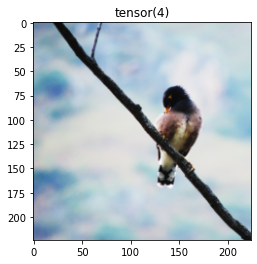

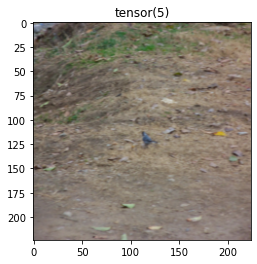

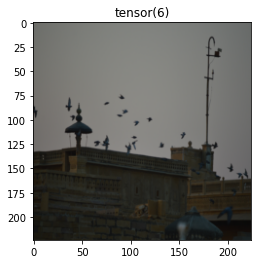

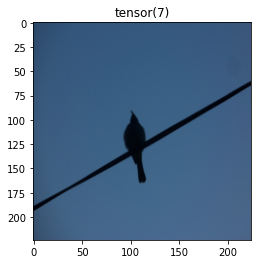

In [4]:
#data visulization
classes = sorted(os.listdir(train_dir))
print("classes", classes)

images, labels = next(iter(train_dataloader))
print("Image Size: ", images.shape)
print("labels", labels)

images = images.permute(0, 2, 3, 1)
print("Image Size after resizing: ", images.shape)
for i in range(batch_size):
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.show()

### pretrained model

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = torchvision.models.vgg16(pretrained=True).to(device)
#print(model)
"""
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x
    
model.avgpool = Identity()
model.classifier = nn.Sequential(
                    nn.Linear(512, 255), 
                    nn.Dropout(p=0.2),
                    nn.Linear(255, 16)
                    )
"""    

print(model)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
# change the number of classes 
model.classifier[6].out_features = 16

# freeze convolution weights
for param in model.features.parameters():
    param.requires_grad = False
   
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
# optimizer
optimizer = optim.SGD(model.classifier.parameters(), lr=0.001, momentum=0.9)
# loss function
criterion = nn.CrossEntropyLoss()


### Training and Validation Functions

In [8]:
# training function
def fit(model, train_dataloader):
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    for i, data  in enumerate(train_dataloader):
        data, target = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        
        train_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        train_running_correct += (preds == target).sum().item()
        
        loss.backward()
        optimizer.step()
   
    train_loss = train_running_loss / len(train_dataloader.dataset)
    train_accuracy = 100. * (train_running_correct / len(train_dataloader.dataset))
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}")
    
    return train_loss, train_accuracy

In [9]:
# validation function
def validata(model, test_dataloader):
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    
    for i, data in enumerate(test_dataloader):
        data, target = data[0].to(device), data[1].to(device)
        output = model(data)
        loss = criterion(output, target)
        
        val_running_loss += loss.item()
        _, preds = torch.max(output.data, 1)
        val_running_correct += (preds == target).sum().item()
        
    val_loss = val_running_loss / len(test_dataloader.dataset)
    val_accuracy = 100. * (val_running_correct / len(test_dataloader.dataset))
    
    return val_loss, val_accuracy


In [10]:
#Train and  validate
epochs = 10

train_loss, train_accuracy = [], []
val_loss, val_accuracy = [], []
start = time.time()
for epoch in range(epochs):
    train_epoch_loss, train_epoch_accuracy = fit(model, train_dataloader)
    val_epoch_loss, val_epoch_accuracy = validata(model, test_dataloader)
    train_loss.append(train_epoch_loss)
    train_accuracy.append(train_epoch_accuracy)
    val_loss.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
end = time.time() 

print((end-start)/60, 'minutes')

Train Loss: 1.1853, Train Accuracy: 16.00
Train Loss: 0.2235, Train Accuracy: 75.33
Train Loss: 0.0791, Train Accuracy: 89.33
Train Loss: 0.0518, Train Accuracy: 92.67
Train Loss: 0.0313, Train Accuracy: 95.33
Train Loss: 0.0104, Train Accuracy: 98.67
Train Loss: 0.0067, Train Accuracy: 98.67
Train Loss: 0.0089, Train Accuracy: 98.00
Train Loss: 0.0038, Train Accuracy: 98.67
Train Loss: 0.0052, Train Accuracy: 98.67
18.495933624108634 minutes


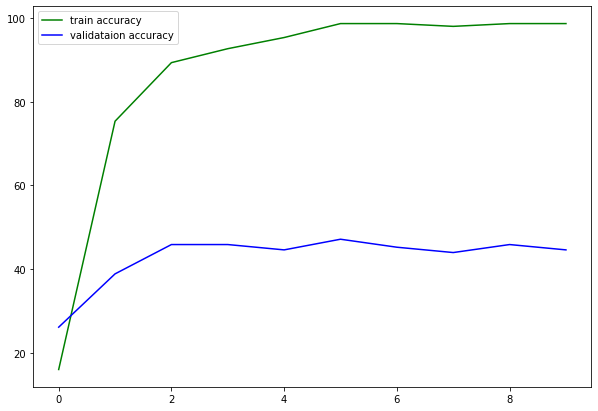

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(val_accuracy, color='blue', label='validataion accuracy')
plt.legend()
plt.savefig('accuracy.png')
plt.show()

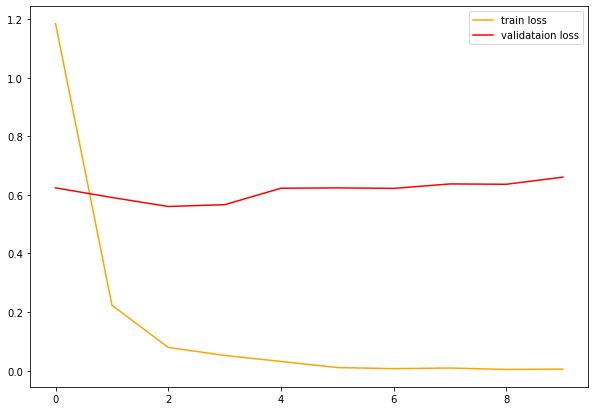

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validataion loss')
plt.legend()
plt.savefig('loss.png')
plt.show()

In [13]:
"""
total_step = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
    # Validation
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in valid_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs
    
        print('Accuracy of the network on the {} validation images: {} %'.format(5000, 100 * correct / total)) 
        
        """

"\ntotal_step = len(train_loader)\n\nfor epoch in range(num_epochs):\n    for i, (images, labels) in enumerate(train_loader):  \n        # Move tensors to the configured device\n        images = images.to(device)\n        labels = labels.to(device)\n        \n        # Forward pass\n        outputs = model(images)\n        loss = criterion(outputs, labels)\n        \n        # Backward and optimize\n        optimizer.zero_grad()\n        loss.backward()\n        optimizer.step()\n\n    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' \n                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))\n            \n    # Validation\n    with torch.no_grad():\n        correct = 0\n        total = 0\n        for images, labels in valid_loader:\n            images = images.to(device)\n            labels = labels.to(device)\n            outputs = model(images)\n            _, predicted = torch.max(outputs.data, 1)\n            total += labels.size(0)\n            correct += 